In [826]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import os

# 1. **브랜드**정보 추출하기(Product_df)


In [827]:
# product table 가져오기
base_path = os.getcwd()
product_df = pd.read_csv(base_path + '/product.csv')
product_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


#### a. 전처리 및 결측치 처리

In [828]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44446 non-null  int64  
 1   gender              44446 non-null  object 
 2   masterCategory      44446 non-null  object 
 3   subCategory         44446 non-null  object 
 4   articleType         44446 non-null  object 
 5   baseColour          44431 non-null  object 
 6   season              44425 non-null  object 
 7   year                44445 non-null  float64
 8   usage               44129 non-null  object 
 9   productDisplayName  44439 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [829]:
product_df.rename(columns={'id': 'product_id'}, inplace=True)

#### b. productDisplayName 활용하기

##### productDisplayName에서 gender를 기준으로 하여 brand를 뽑아낼 수 있을 것이라 예상

In [830]:
# gender 확인
product_df.gender.unique()

array(['Men', 'Women', 'Boys', 'Girls', 'Unisex'], dtype=object)

In [831]:
product_df.productDisplayName

0                         Turtle Check Men Navy Blue Shirt
1                       Peter England Men Party Blue Jeans
2                                 Titan Women Silver Watch
3            Manchester United Men Solid Black Track Pants
4                                    Puma Men Grey T-shirt
5                     Inkfruit Mens Chain Reaction T-shirt
6                         Fabindia Men Striped Green Shirt
7                            Jealous 21 Women Purple Shirt
8                                 Puma Men Pack of 3 Socks
9                                   Skagen Men Black Watch
10         Puma Men Future Cat Remix SF Black Casual Shoes
11                  Fossil Women Black Huarache Weave Belt
12                       Fila Men Cush Flex Black Slippers
13                               Murcia Women Blue Handbag
14                          Ben 10 Boys Navy Blue Slippers
15                   Reid & Taylor Men Check Purple Shirts
16                 Police Men Black Dial Watch PL12889JV

In [832]:
pd.set_option('display.max_rows', None)

In [833]:
# 데이터 확인 후 최대한 구분 기준을 세부화했으나 약 3000개 정도 구분점 설정 실패 -> 그냥 첫번째 글자를 브랜드명으로 쓰기로 결정
brand_1 = product_df[product_df.productDisplayName.notnull() & product_df.productDisplayName.str.contains(r'Men|Man|Women|Woman|Boys|Boy\'s|Boy|Girls|Girl|Girl\'s|Kids|Unisex')]['productDisplayName'].str.split().str[0]
len(brand_1)

41155

##### productDisplayName에서 첫번째 단어를 브랜드명으로 간주

In [834]:
brand = product_df.productDisplayName.str.split().str[0]
brand.head()

0        Turtle
1         Peter
2         Titan
3    Manchester
4          Puma
Name: productDisplayName, dtype: object

In [835]:
brand.value_counts()

Nike                                            2289
Puma                                            2088
ADIDAS                                          2071
United                                          1400
Fabindia                                         751
Catwalk                                          743
Gini                                             721
Arrow                                            700
Fastrack                                         689
Wrangler                                         684
Lino                                             655
Baggit                                           623
Red                                              550
Lee                                              521
Myntra                                           476
Scullers                                         455
French                                           430
Fila                                             423
Jealous                                       

In [836]:
brand = brand.str.lower()

In [837]:
brand = brand.dropna()

#### 2021년 인도네시아 18세 ~ 55세 설문조사 결과를 토대로 인기있는 상위 10개 브랜드가 이커머스에 입점되어 있는지 확인 

In [838]:
# 이커머스 회사의 고객 타겟층인 18세에서 35세와 다소 차이가 있을 수 있으나, 참고 목적으로 살펴볼 예정
    # 출처 : https://welcon.kocca.kr/cmm/fms/CrawlingFileDown.do?atchFileId=FILE_f016d5ef-6951-4e09-9cf0-8f513a360671&fileSn=1
for famous_brand in ['adidas', 'h&m', 'converse', 'uniqlo', 'nike', 'eiger', '3second', 'nevada', 'vans', 'cardinal']:
    print(f'{famous_brand} :', len(brand[brand.str.contains(famous_brand)]))

adidas : 2080
h&m : 0
converse : 174
uniqlo : 0
nike : 2289
eiger : 0
3second : 0
nevada : 0
vans : 196
cardinal : 0


In [839]:
# 문제점 : 인도네시아에서 인기있는 브랜드인 adidas, nike를 제외하고 입점이 안되어있거나 제품 수가 매우 적음

# 2. 구매로 이어진 검색어

##### 검색어 관련 EDA

In [ ]:
transation_df = pd.read_csv('/Users/hj/Documents/tp2-da/transaction_new.csv')
transation_df.head()

In [840]:
click_df = pd.read_csv('/Users/hj/Documents/tp2-da/click_stream_new.csv')
click_df.head()

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,15315.0,4.0,313529.0,NaN,NaN,NaN,NaN
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN


In [841]:
# 컬럼명 수정
new_column = ['session_id'] + list(click_df.columns[1:])
click_df.columns = new_column

In [842]:
click_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745588 entries, 0 to 745587
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   session_id       745588 non-null  object 
 1   event_name       745587 non-null  object 
 2   event_time       745587 non-null  object 
 3   event_id         745587 non-null  object 
 4   traffic_source   745587 non-null  object 
 5   product_id       81930 non-null   float64
 6   quantity         81930 non-null   float64
 7   item_price       81930 non-null   float64
 8   payment_status   45140 non-null   object 
 9   search_keywords  77335 non-null   object 
 10  promo_code       19648 non-null   object 
 11  promo_amount     19648 non-null   float64
dtypes: float64(4), object(8)
memory usage: 68.3+ MB


In [843]:
click_df.event_id.nunique()

745587

In [844]:
# 검색 키워드 유니크 값
click_df.search_keywords.unique()

array([nan, 'Dress Kondangan', 'Tas Wanita', 'Celana Panjang', 'Kaos',
       'Sepatu', 'Tas Kerja', 'T-Shirt', 'Topi', 'Bekas', 'Baju',
       'Thrift', 'Sepatu Nike', 'Dress Pesta', 'Sepatu Adidas', 'Second',
       'T-shirt', 'Jam', 'Celana', 'Second Hand', 'Barang Bekas',
       'Sendal', 'Daster', 'Baju Tidur'], dtype=object)

In [845]:
# 검색 키워드가 NaN 값이 아닌 데이터: 77335개
len(click_df) - click_df.search_keywords.isnull().sum()

77335

In [846]:
# SEARCH라는 이벤트가 있을때만 검색 키워드 존재
click_df.groupby(['search_keywords', 'event_name']).count()

,,session_id,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,promo_code,promo_amount
search_keywords,event_name,,,,,,,,,,
Baju,SEARCH,5501,5501,5501,5501,0,0,0,0,0,0
Baju Tidur,SEARCH,184,184,184,184,0,0,0,0,0,0
Barang Bekas,SEARCH,1805,1805,1805,1805,0,0,0,0,0,0
Bekas,SEARCH,7355,7355,7355,7355,0,0,0,0,0,0
Celana,SEARCH,904,904,904,904,0,0,0,0,0,0
Celana Panjang,SEARCH,1850,1850,1850,1850,0,0,0,0,0,0
Daster,SEARCH,87,87,87,87,0,0,0,0,0,0
Dress Kondangan,SEARCH,16567,16567,16567,16567,0,0,0,0,0,0
Dress Pesta,SEARCH,4938,4938,4938,4938,0,0,0,0,0,0


In [847]:
# 검색을 많이 한 순서대로 정렬
# 번역
    # 1등 Dress Kondangan -> Dress
    # 2등 Tas Wanita -> 여성용 가방
    # 3등 Bekas -> 중고(?!)
    # 5등 Kaos -> 셔츠
    # 6등 Baju -> Blouse
    # 7등 Dress Pesta -> Dress
    # 8등 Sepatu NIKE -> 나이키 구두
    # 9등 Tas Kerja -> 업무용 가방
    # 10등 Second -> 중고(?!)
    # 11등 Sepatu -> 구두
    # 12등 Second Hand -> 중고(?!)
    # 13등 Thrift -> 중고(?!)
    # 14등 Celana Panjang -> 긴 바지
    # 15등 Berang Bekas -> 중고 상품(?!)
    # 16등 Sepatu Adidas -> 아디다스 구두
    # 17등 Celana -> 바지
    # 20등 jam -> 시(시간을 의미하는 단어인데 뭔지 모르겠음)
    # 21등 Topi -> 모자
    # 22등 Baju Tidur -> 잠옷
    # 23등 Daster -> 하우스 드레스
click_df.groupby(['search_keywords', 'event_name'])['event_id'].count().sort_values(ascending=False)

search_keywords  event_name
Dress Kondangan  SEARCH        16567
Tas Wanita       SEARCH         8366
Bekas            SEARCH         7355
T-Shirt          SEARCH         6898
Kaos             SEARCH         5647
Baju             SEARCH         5501
Dress Pesta      SEARCH         4938
Sepatu Nike      SEARCH         3255
Tas Kerja        SEARCH         2498
Second           SEARCH         1957
Sepatu           SEARCH         1891
Second Hand      SEARCH         1870
Thrift           SEARCH         1854
Celana Panjang   SEARCH         1850
Barang Bekas     SEARCH         1805
Sepatu Adidas    SEARCH         1643
Celana           SEARCH          904
Sendal           SEARCH          844
T-shirt          SEARCH          525
Jam              SEARCH          504
Topi             SEARCH          392
Baju Tidur       SEARCH          184
Daster           SEARCH           87
Name: event_id, dtype: int64

In [848]:
# 위 인도네시아 번역한 것을 바탕으로 키워드 재구성
search_dict = {'Dress Kondangan':'Dress', 'Tas Wanita':'Woman\'s Bag', 'Bekas':'Second Hand', 'T-shirt':'T-Shirt',
               'Kaos':'Shirts', 'Baju':'Shirts', 'Dress Pesta':'Dress', 'Sepatu Nike':'Nike Shoes', 'Tas Kerja':'Work Bag',
               'Second':'Second Hand', 'Sepatu':'Shoes', 'Thrift':'Second Hand', 'Celana Panjang':'Trousers',
               'Barang Bekas':'Second Hand', 'Sepatu Adidas':'Adidas Shoes', 'Celana':'Trousers', 'Sendal':'Sandal',
               'Jam':'Time', 'Topi':'Hat', 'Baju Tidur':'Pajamas', 'Daster':'House dress'}

click_df.search_keywords = click_df.search_keywords.replace(search_dict)
click_df.search_keywords.unique()

array([nan, 'Dress', "Woman's Bag", 'Trousers', 'Shirts', 'Shoes',
       'Work Bag', 'T-Shirt', 'Hat', 'Second Hand', 'Nike Shoes',
       'Adidas Shoes', 'Time', 'Sandal', 'House dress', 'Pajamas'],
      dtype=object)

In [849]:
# 번역한 데이터를 바탕으로 키워드 순위 재구성 

# -> 1. 드레스에 대한 수요가 많음
# -> 2. 중고상품에 대한 수요가 많음
# -> 3. Nike, Adidas 신발 수요 많음
# -> 4. Time에 대한 검색 수요가 있음(..?)
click_df.groupby(['search_keywords', 'event_name'])['event_id'].count().sort_values(ascending=False)

search_keywords  event_name
Dress            SEARCH        21505
Second Hand      SEARCH        14841
Shirts           SEARCH        11148
Woman's Bag      SEARCH         8366
T-Shirt          SEARCH         7423
Nike Shoes       SEARCH         3255
Trousers         SEARCH         2754
Work Bag         SEARCH         2498
Shoes            SEARCH         1891
Adidas Shoes     SEARCH         1643
Sandal           SEARCH          844
Time             SEARCH          504
Hat              SEARCH          392
Pajamas          SEARCH          184
House dress      SEARCH           87
Name: event_id, dtype: int64

In [850]:
click_df.head()

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,15315.0,4.0,313529.0,NaN,NaN,NaN,NaN
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN


In [851]:
# 2016~2022년까지 매년 월별 전체검색 수, 중고 검색 수, 전체 검색 수 대비 중고 검색 비율

# event_time을 object에서 시계열 데이터로 데이터타입 변환
click_df['event_time'] = pd.to_datetime(click_df['event_time'])
# 월 추출
click_df['month'] = click_df['event_time'].dt.to_period('M')

# 매년 월별 전체검색 수, 중고 검색 수, 전체 검색 수 대비 중고 검색 비율 정보 데이터프레임
temp_click_df = click_df[click_df['search_keywords'].notnull()].groupby('month')['event_id'].count()
temp_click_df = pd.DataFrame(data=temp_click_df).reset_index()
temp_click_df['month'] = temp_click_df['month'].astype('str')

temp_secondhand = click_df[click_df['search_keywords'] == 'Second Hand'].groupby('month')['event_id'].count()
temp_secondhand = pd.DataFrame(data=temp_secondhand).reset_index()
temp_secondhand['month'] = temp_click_df['month'].astype('str')

temp_click_df = pd.merge(temp_click_df, temp_secondhand, how='inner', on='month')
temp_click_df.columns = ['month', 'total_count', 'second_hand_count']

temp_click_df['ratio_second_hand'] = round((temp_click_df['second_hand_count'] / temp_click_df['total_count']) * 100, 2)
temp_click_df.head()

/var/folders/72/sf0gd2_15c7bv2klzkjcqt580000gn/T/ipykernel_32498/415959934.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  click_df['month'] = click_df['event_time'].dt.to_period('M')


,month,total_count,second_hand_count,ratio_second_hand
0,2016-07,23,2,8.70
1,2016-08,54,15,27.78
2,2016-09,128,29,22.66
3,2016-10,123,20,16.26
4,2016-11,185,41,22.16


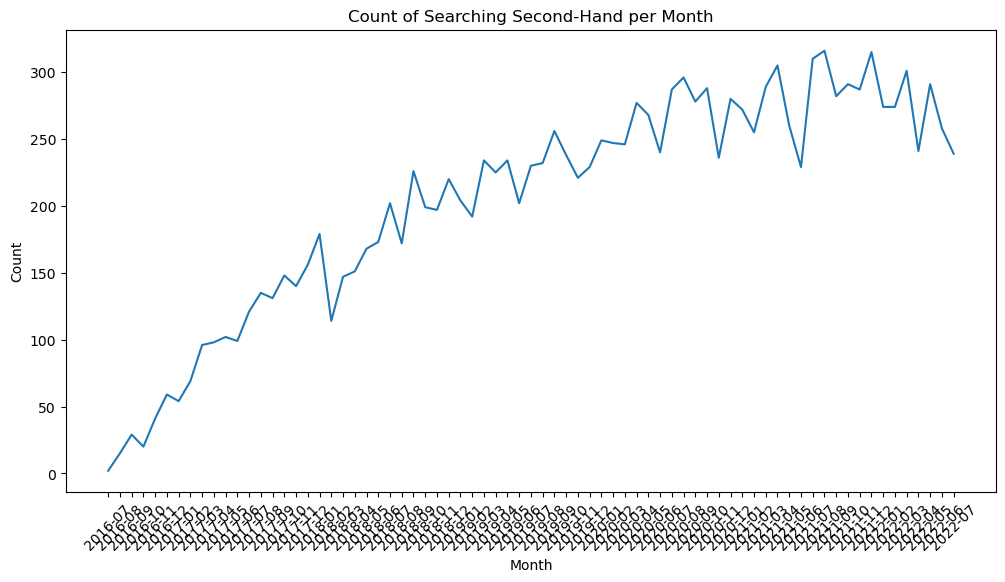

In [852]:
# 월별로 중고 검색 횟수 모아보기
plt.figure(figsize=(12, 6))
ax = sns.lineplot(temp_click_df, x='month', y='second_hand_count')
# ax2 = ax.twinx()
# ax2 = sns.barplot(temp_click_df, x='month', y='ratio_second_hand', ax=ax2)

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Searching Second-Hand per Month')
plt.xticks(rotation=45)
plt.show()

##### 구매로 이어진(구매시도까지 이어진) 검색어 탐색

In [853]:
click_df = click_df.sort_values(by='event_time')

In [854]:
click_df.payment_status.unique()

array([nan, 'Success', 'Failed'], dtype=object)

In [855]:
click_df.head()

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,month
404213,8a581d5d-35aa-4340-ba9b-4e258b569505,HOMEPAGE,2016-07-03 05:43:43.729984+00:00,0199154d-6c6d-4bca-b141-1bdcecbf5103,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07
404214,8a581d5d-35aa-4340-ba9b-4e258b569505,ADD_TO_CART,2016-07-03 05:44:16.729984+00:00,80b47cac-c83e-4321-abca-d2f2c86d9ea6,MOBILE,5227.0,1.0,115755.0,NaN,NaN,NaN,NaN,2016-07
404217,8a581d5d-35aa-4340-ba9b-4e258b569505,CLICK,2016-07-03 05:44:25.729984+00:00,e320ec01-3961-429a-9788-bf26dea6a0c0,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07
404215,8a581d5d-35aa-4340-ba9b-4e258b569505,ADD_PROMO,2016-07-03 05:44:53.729984+00:00,4c35d53f-91e0-4e60-84cf-5000118a507f,MOBILE,NaN,NaN,NaN,NaN,NaN,WEEKENDMANTAP,4549.0,2016-07
404218,8a581d5d-35aa-4340-ba9b-4e258b569505,SEARCH,2016-07-03 05:45:05.729984+00:00,c89b0abd-e9f3-4442-affa-04a0e5cf3c8f,MOBILE,NaN,NaN,NaN,NaN,Second Hand,NaN,NaN,2016-07


In [856]:
# 추후 session 정보가 생기면 더 자세하게 진행
print(f'session_id 유니크값: {click_df.session_id.nunique()}')

print(f"session_id 값들 중 검색을 한 session_id 수: {click_df[click_df.event_name == 'SEARCH']['session_id'].nunique()}")

print(f"session_id 중 검색이 포함된 session_id 비율: {round(click_df[click_df.event_name == 'SEARCH']['session_id'].nunique()/click_df.session_id.nunique() * 100, 2)}%")
num_search = len(click_df[click_df['event_name'] == 'SEARCH'])

print(f'검색 횟수: {num_search}')

session_id 유니크값: 45405
session_id 값들 중 검색을 한 session_id 수: 28742
session_id 중 검색이 포함된 session_id 비율: 63.3%
검색 횟수: 77335


In [857]:
# 검색에서 중고상품을 검색해도 데이터에서는 중고상품인지 여부 판단 불가
click_df[(click_df.event_name == 'SEARCH') & (click_df.search_keywords == 'Second Hand')]['session_id'].nunique()

11157

In [858]:
# 검색에서 중고상품을 검색한 경우 제외한 경우 session_id
click_df[(click_df.event_name == 'SEARCH') & (click_df.search_keywords != 'Second Hand')]['session_id'].unique()

array(['8a581d5d-35aa-4340-ba9b-4e258b569505',
       '7175244f-37c4-4ec2-900e-26360a40220e',
       '8b87c086-942e-4cfd-a1b8-b5e6bf0a5b55', ...,
       '861262e7-573d-42da-b803-56b5f360aa64',
       '0e7998bf-090b-4836-bb4a-95fb79aa7539',
       'ea1f0447-4ff4-4a5f-b13f-7437e1605f8e'], dtype=object)

In [859]:
# T-Shirt -> Tshirts(articleType)
# Shoes, Adidas Shoes, Nike Shoes -> Shoes
# Woman's Bag, Work Bag -> Bags
# Dress -> Dress
# Sandal -> Sandas
# Shirts -> shirts
# Trousers -> trousers(articleType)
# Pajamas, House Dress -> Loungewear and Nightwear
# Hat -> Hat(articleType)

In [860]:
click_df[click_df['event_name'] == 'SEARCH']['session_id'].head()

404218    8a581d5d-35aa-4340-ba9b-4e258b569505
404223    8a581d5d-35aa-4340-ba9b-4e258b569505
404225    8a581d5d-35aa-4340-ba9b-4e258b569505
404228    8a581d5d-35aa-4340-ba9b-4e258b569505
434480    7175244f-37c4-4ec2-900e-26360a40220e
Name: session_id, dtype: object

In [ ]:
temp = click_df[click_df.session_id == '98e66f53-f24f-4238-8c9c-34a0482e22d5'].reset_index(drop=True)
search_idx = temp[temp['event_name'] == 'SEARCH'].index
search_dict = {idx:temp.loc[idx]['search_keywords'] for idx in search_idx}
trans_idx = temp[(temp['event_name'] == 'ADD_TO_CART') | (temp['event_name'] == 'BOOKING')].index
search_dict

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753


In [ ]:
transation_df[transation_df['session_id'] == '98e66f53-f24f-4238-8c9c-34a0482e22d5'].head()

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
429824,2019-10-03T12:34:39.425431Z,18770,d2d99246-0eee-4d10-a902-7ef1b07d9c1f,98e66f53-f24f-4238-8c9c-34a0482e22d5,Credit Card,Success,6307,AZ2022,10000,2019-10-08T06:14:02.438589Z,-6.946658,107.566332,265140,41867,1,261447


In [ ]:
click_df.search_keywords.unique()

array([nan, 'Second Hand', 'T-Shirt', 'Shoes', "Woman's Bag",
       'Wedding Dress', 'Party Dress', 'Adidas Shoes', 'Nike Shoes',
       'Sandal', 'Shirts', 'Blouse', 'Work Bag', 'Long Pants', 'Time',
       'Trousers', 'Pajamas', 'House dress', 'Hat'], dtype=object)

In [ ]:
product_df.articleType.unique()

array(['Shirts', 'Jeans', 'Watches', 'Track Pants', 'Tshirts', 'Socks',
       'Casual Shoes', 'Belts', 'Flip Flops', 'Handbags', 'Tops', 'Bra',
       'Sandals', 'Shoe Accessories', 'Sweatshirts', 'Deodorant',
       'Formal Shoes', 'Bracelet', 'Lipstick', 'Flats', 'Kurtas',
       'Waistcoat', 'Sports Shoes', 'Shorts', 'Briefs', 'Sarees',
       'Perfume and Body Mist', 'Heels', 'Sunglasses', 'Innerwear Vests',
       'Pendant', 'Nail Polish', 'Laptop Bag', 'Scarves', 'Rain Jacket',
       'Dresses', 'Night suits', 'Skirts', 'Wallets', 'Blazers', 'Ring',
       'Kurta Sets', 'Clutches', 'Shrug', 'Backpacks', 'Caps', 'Trousers',
       'Earrings', 'Camisoles', 'Boxers', 'Jewellery Set', 'Dupatta',
       'Capris', 'Lip Gloss', 'Bath Robe', 'Mufflers', 'Tunics',
       'Jackets', 'Trunk', 'Lounge Pants', 'Face Wash and Cleanser',
       'Necklace and Chains', 'Duffel Bag', 'Sports Sandals',
       'Foundation and Primer', 'Sweaters', 'Free Gifts', 'Trolley Bag',
       'Tracksuits', 'S

In [ ]:

product_df.subCategory.unique()

array(['Topwear', 'Bottomwear', 'Watches', 'Socks', 'Shoes', 'Belts',
       'Flip Flops', 'Bags', 'Innerwear', 'Sandal', 'Shoe Accessories',
       'Fragrance', 'Jewellery', 'Lips', 'Saree', 'Eyewear', 'Nails',
       'Scarves', 'Dress', 'Loungewear and Nightwear', 'Wallets',
       'Apparel Set', 'Headwear', 'Mufflers', 'Skin Care', 'Makeup',
       'Free Gifts', 'Ties', 'Accessories', 'Skin', 'Beauty Accessories',
       'Water Bottle', 'Eyes', 'Bath and Body', 'Gloves',
       'Sports Accessories', 'Cufflinks', 'Sports Equipment', 'Stoles',
       'Hair', 'Perfumes', 'Home Furnishing', 'Umbrellas', 'Wristbands',
       'Vouchers'], dtype=object)

In [ ]:
click_df.head()

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,month
404213,8a581d5d-35aa-4340-ba9b-4e258b569505,HOMEPAGE,2016-07-03 05:43:43.729984+00:00,0199154d-6c6d-4bca-b141-1bdcecbf5103,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07
404214,8a581d5d-35aa-4340-ba9b-4e258b569505,ADD_TO_CART,2016-07-03 05:44:16.729984+00:00,80b47cac-c83e-4321-abca-d2f2c86d9ea6,MOBILE,5227.0,1.0,115755.0,NaN,NaN,NaN,NaN,2016-07
404217,8a581d5d-35aa-4340-ba9b-4e258b569505,CLICK,2016-07-03 05:44:25.729984+00:00,e320ec01-3961-429a-9788-bf26dea6a0c0,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07
404215,8a581d5d-35aa-4340-ba9b-4e258b569505,ADD_PROMO,2016-07-03 05:44:53.729984+00:00,4c35d53f-91e0-4e60-84cf-5000118a507f,MOBILE,NaN,NaN,NaN,NaN,NaN,WEEKENDMANTAP,4549.0,2016-07
404218,8a581d5d-35aa-4340-ba9b-4e258b569505,SEARCH,2016-07-03 05:45:05.729984+00:00,c89b0abd-e9f3-4442-affa-04a0e5cf3c8f,MOBILE,NaN,NaN,NaN,NaN,Second Hand,NaN,NaN,2016-07
